## Installing TGAN

In [1]:
pip install tgan

## Importing libraries

In [2]:
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

## Mounting drive

In [3]:
from google.colab import drive
drive.mount('/content/gdrive') 

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


## Loading and preprocessing data

In [4]:
with open('gdrive/Shareddrives/BMP/data/usable_data', 'r') as fout:
    usable_data = json.load(fout)

In [5]:
usable_data[0].keys()

dict_keys(['gas', 'elastic', 'ionization', 'excitation', 'swarm'])

In [6]:
df = pd.json_normalize(usable_data)

In [7]:
len(df['elastic.energy'][0])

100

In [8]:
df.head()

,gas,elastic.gas,elastic.thresh,elastic.energy,elastic.crosssection,ionization.gas,ionization.thresh,ionization.energy,ionization.crosssection,excitation.gas,excitation.thresh,excitation.energy,excitation.crosssection,swarm.EN,swarm.mean_energy,swarm.mobility,swarm.diffusion,swarm.energy_mobility,swarm.energy_diffusion,swarm.total_collision_freq,swarm.momentum_freq,swarm.total_ionization_freq,swarm.townsend,swarm.power,swarm.elastic_power_loss,swarm.inelastic_power_loss,swarm.growth_power,swarm.max_energy,swarm.drift_velocity
0,Ar,Ar,0.000014,"[0.1, 0.10722672220103231, 0.11497569953977356...","[5.469070275955275e-21, 4.765939017124022e-21,...",Ar,15.7600,"[1.0, 1.09755405800353, 1.2046249102400157, 1....","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",Ar,11.54800,"[0.1, 0.10980397790479064, 0.12056913563715747...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0.001, 0.00115, 0.001322, 0.00152, 0.001748, ...","[0.0582, 0.06514, 0.07452, 0.08678, 0.102, 0.1...","[2.783e+26, 2.805e+26, 2.827e+26, 2.836e+26, 2...","[1.256e+25, 1.469e+25, 1.759e+25, 2.134e+25, 2...","[5.219e+26, 5.257e+26, 5.222e+26, 5.089e+26, 4...","[2.751e+25, 3.247e+25, 3.806e+25, 4.378e+25, 4...","[6.13e-16, 6.173e-16, 6.195e-16, 6.192e-16, 6....","[6.32e-16, 6.27e-16, 6.222e-16, 6.203e-16, 6.2...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[2.783e-22, 3.708e-22, 4.94e-22, 6.551e-22, 8....","[2.785e-22, 3.711e-22, 4.943e-22, 6.553e-22, 8...","[8.326e-30, 6.084e-27, 1.271e-24, 8.752e-23, 2...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.8792, 0.8792, 0.8792, 0.8792, 0.8792, 1.047...","[2.7830000000000002e+23, 3.22575e+23, 3.737294..."
1,D2,D2,0.000136,"[0.1, 0.10722672220103231, 0.11497569953977356...","[1.044e-19, 1.0568127232723253e-19, 1.06978300...",D2,15.4270,"[1.0, 1.09755405800353, 1.2046249102400157, 1....","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",D2,0.03770,"[0.1, 0.10980397790479064, 0.12056913563715747...","[4.6e-22, 4.852649210975779e-22, 5.11917495344...","[0.001, 0.00115, 0.001322, 0.00152, 0.001748, ...","[0.03878, 0.03878, 0.03878, 0.03878, 0.03878, ...","[1.319e+25, 1.319e+25, 1.319e+25, 1.319e+25, 1...","[3.415e+23, 3.415e+23, 3.415e+23, 3.415e+23, 3...","[1.743e+25, 1.743e+25, 1.743e+25, 1.743e+25, 1...","[4.503e+23, 4.503e+23, 4.503e+23, 4.503e+23, 4...","[1.131e-14, 1.131e-14, 1.131e-14, 1.131e-14, 1...","[1.333e-14, 1.333e-14, 1.333e-14, 1.333e-14, 1...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[1.319e-23, 1.744e-23, 2.305e-23, 3.047e-23, 4...","[3.3e-24, 4.368e-24, 5.78e-24, 7.645e-24, 1.01...","[9.863e-24, 1.305e-23, 1.727e-23, 2.284e-23, 3...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.6211, 0.6211, 0.6211, 0.6211, 0.6211, 0.621...","[1.319e+22, 1.51685e+22, 1.7437180000000002e+2..."
2,H2,H2,0.000272,"[0.1, 0.10722672220103231, 0.11497569953977356...","[1.0473161484085503e-19, 1.0612652007324187e-1...",H2,15.4180,"[1.0, 1.09755405800353, 1.2046249102400157, 1....","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",H2,0.12797,"[0.1, 0.10980397790479064, 0.12056913563715747...","[0, 0, 0, 1.724123037414417e-25, 1.48686453896...","[0.001, 0.00115, 0.001322, 0.00152, 0.001748, ...","[0.03878, 0.03878, 0.03878, 0.03878, 0.03879, ...","[1.318e+25, 1.318e+25, 1.317e+25, 1.317e+25, 1...","[3.411e+23, 3.411e+23, 3.411e+23, 3.411e+23, 3...","[1.742e+25, 1.742e+25, 1.742e+25, 1.742e+25, 1...","[4.501e+23, 4.501e+23, 4.501e+23, 4.501e+23, 4...","[1.133e-14, 1.133e-14, 1.133e-14, 1.133e-14, 1...","[1.335e-14, 1.335e-14, 1.335e-14, 1.335e-14, 1...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[1.318e-23, 1.742e-23, 2.302e-23, 3.044e-23, 4...","[1.27e-23, 1.679e-23, 2.22e-23, 2.935e-23, 3.8...","[5.122e-25, 6.778e-25, 8.969e-25, 1.186e-24, 1...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.6211, 0.6211, 0.62

In [9]:
df.drop(['elastic.gas', 'ionization.gas', 'excitation.gas'], axis=1, inplace = True)

In [10]:
df

,gas,elastic.thresh,elastic.energy,elastic.crosssection,ionization.thresh,ionization.energy,ionization.crosssection,excitation.thresh,excitation.energy,excitation.crosssection,swarm.EN,swarm.mean_energy,swarm.mobility,swarm.diffusion,swarm.energy_mobility,swarm.energy_diffusion,swarm.total_collision_freq,swarm.momentum_freq,swarm.total_ionization_freq,swarm.townsend,swarm.power,swarm.elastic_power_loss,swarm.inelastic_power_loss,swarm.growth_power,swarm.max_energy,swarm.drift_velocity
0,Ar,0.000014,"[0.1, 0.10722672220103231, 0.11497569953977356...","[5.469070275955275e-21, 4.765939017124022e-21,...",15.760000,"[1.0, 1.09755405800353, 1.2046249102400157, 1....","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",11.548000,"[0.1, 0.10980397790479064, 0.12056913563715747...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0.001, 0.00115, 0.001322, 0.00152, 0.001748, ...","[0.0582, 0.06514, 0.07452, 0.08678, 0.102, 0.1...","[2.783e+26, 2.805e+26, 2.827e+26, 2.836e+26, 2...","[1.256e+25, 1.469e+25, 1.759e+25, 2.134e+25, 2...","[5.219e+26, 5.257e+26, 5.222e+26, 5.089e+26, 4...","[2.751e+25, 3.247e+25, 3.806e+25, 4.378e+25, 4...","[6.13e-16, 6.173e-16, 6.195e-16, 6.192e-16, 6....","[6.32e-16, 6.27e-16, 6.222e-16, 6.203e-16, 6.2...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[2.783e-22, 3.708e-22, 4.94e-22, 6.551e-22, 8....","[2.785e-22, 3.711e-22, 4.943e-22, 6.553e-22, 8...","[8.326e-30, 6.084e-27, 1.271e-24, 8.752e-23, 2...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.8792, 0.8792, 0.8792, 0.8792, 0.8792, 1.047...","[2.7830000000000002e+23, 3.22575e+23, 3.737294..."
1,D2,0.000136,"[0.1, 0.10722672220103231, 0.11497569953977356...","[1.044e-19, 1.0568127232723253e-19, 1.06978300...",15.427000,"[1.0, 1.09755405800353, 1.2046249102400157, 1....","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.037700,"[0.1, 0.10980397790479064, 0.12056913563715747...","[4.6e-22, 4.852649210975779e-22, 5.11917495344...","[0.001, 0.00115, 0.001322, 0.00152, 0.001748, ...","[0.03878, 0.03878, 0.03878, 0.03878, 0.03878, ...","[1.319e+25, 1.319e+25, 1.319e+25, 1.319e+25, 1...","[3.415e+23, 3.415e+23, 3.415e+23, 3.415e+23, 3...","[1.743e+25, 1.743e+25, 1.743e+25, 1.743e+25, 1...","[4.503e+23, 4.503e+23, 4.503e+23, 4.503e+23, 4...","[1.131e-14, 1.131e-14, 1.131e-14, 1.131e-14, 1...","[1.333e-14, 1.333e-14, 1.333e-14, 1.333e-14, 1...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[1.319e-23, 1.744e-23, 2.305e-23, 3.047e-23, 4...","[3.3e-24, 4.368e-24, 5.78e-24, 7.645e-24, 1.01...","[9.863e-24, 1.305e-23, 1.727e-23, 2.284e-23, 3...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.6211, 0.6211, 0.6211, 0.6211, 0.6211, 0.621...","[1.319e+22, 1.51685e+22, 1.7437180000000002e+2..."
2,H2,0.000272,"[0.1, 0.10722672220103231, 0.11497569953977356...","[1.0473161484085503e-19, 1.0612652007324187e-1...",15.418000,"[1.0, 1.09755405800353, 1.2046249102400157, 1....","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.127970,"[0.1, 0.10980397790479064, 0.12056913563715747...","[0, 0, 0, 1.724123037414417e-25, 1.48686453896...","[0.001, 0.00115, 0.001322, 0.00152, 0.001748, ...","[0.03878, 0.03878, 0.03878, 0.03878, 0.03879, ...","[1.318e+25, 1.318e+25, 1.317e+25, 1.317e+25, 1...","[3.411e+23, 3.411e+23, 3.411e+23, 3.411e+23, 3...","[1.742e+25, 1.742e+25, 1.742e+25, 1.742e+25, 1...","[4.501e+23, 4.501e+23, 4.501e+23, 4.501e+23, 4...","[1.133e-14, 1.133e-14, 1.133e-14, 1.133e-14, 1...","[1.335e-14, 1.335e-14, 1.335e-14, 1.335e-14, 1...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[1.318e-23, 1.742e-23, 2.302e-23, 3.044e-23, 4...","[1.27e-23, 1.679e-23, 2.22e-23, 2.935e-23, 3.8...","[5.122e-25, 6.778e-25, 8.969e-25, 1.186e-24, 1...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.6211, 0.6211, 0.6211, 0.6211, 0.6211, 0.621...","[1.3179999999999999e+22, 1.51

In [11]:
df_ip = pd.DataFrame()
df_ip['elastic.energy'] = df['elastic.energy'][0]
for i in range(45):
    df_ip[i+1] = df['elastic.crosssection'][i]

In [12]:
df_ip = df_ip.drop(['elastic.energy'],axis=1)
df_ip.head()

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45
0,5.469070e-21,1.044000e-19,1.047316e-19,5.865454e-20,8.605642e-20,7.069127e-21,3.770179e-20,6.150000e-19,5.949384e-20,3.103697e-19,5.200000e-19,3.640587e-19,2.600000e-21,2.000000e-18,7.557134e-20,4.242757e-19,1.227290e-18,1.145823e-20,1.029000e-18,1.391020e-19,1.691718e-19,6.371059e-18,5.890578e-18,4.043521e-19,7.167818e-18,2.680563e-18,1.281502e-17,1.004820e-17,5.257125e-18,1.992190e-17,1.834679e-17,1.855679e-17,1.448665e-17,1.498930e-19,3.275000e-20,2.028253e-20,2.302406e-18,6.380530e-20,3.910000e-19,1.360000e-20,1.309999e-20,6.510000e-20,9.703000e-20,2.084986e-18,4.200000e-20
1,4.765939e-21,1.056813e-19,1.061265e-19,5.890275e-20,7.940299e-20,7.274709e-21,4.174580e-20,5.827244e-19,6.131506e-20,2.902118e-19,4.961654e-19,3.450032e-19,2.142436e-21,1.899763e-18,7.862909e-20,4.768882e-19,1.152631e-18,1.170361e-20,8.001894e-19,1.374996e-19,1.643684e-19,6.242272e-18,5.875634e-18,4.021129e-19,6.689836e-18,2.544696e-18,1.199625e-17,9.385087e-18,4.918134e-18,1.859784e-17,1.723140e-17,1.733587e-17,1.343952e-17,1.552607e-19,3.869555e-20,1.846992e-20,2.127055e-18,5.757871e-20,3.861965e-19,1.394876e-20,1.429365e-20,6.689676e-20,9.370581e-20,2.262116e-18,4.282895e-20
2,4.024491e-21,1.069783e-19,1.075980e-19,5.919749e-20,7.283978e-20,7.488451e-21,4.477947e-20,5.521426e-19,6.320588e-20,2.692945e-19,4.734250e-19,3.269450e-19,1.765394e-21,1.804537e-18,8.175452e-20,5.389002e-19,1.082882e-18,1.196747e-20,6.483273e-19,1.357815e-19,1.602204e-19,6.092679e-18,5.856929e-18,3.998886e-19,6.244183e-18,2.415731e-18,1.137069e-17,8.833821e-18,4.680969e-18,1.736200e-17,1.618388e-17,1.619535e-17,1.246927e-17,1.608206e-19,4.572046e-20,1.682019e-20,1.975409e-18,5.224212e-20,3.814540e-19,1.430680e-20,1.554278e-20,6.874310e-20,9.165915e-20,2.446229e-18,4.367421e-20
3,3.370606e-21,1.082912e-19,1.091112e-19,5.950940e-20,6.666644e-20,7.709223e-21,4.750619e-20,5.231662e-19,6.515997e-20,2.493827e-19,4.517785e-19,3.098321e-19,1.454710e-21,1.714089e-18,8.499169e-20,6.103144e-19,1.016598e-18,1.224094e-20,5.424649e-19,1.339392e-19,1.557804e-19,5.968874e-18,5.836926e-18,3.976686e-19,5.827497e-18,2.293276e-18,1.077786e-17,8.316246e-18,4.455315e-18,1.620759e-17,1.520001e-17,1.512966e-17,1.157160e-17,1.641557e-19,5.222254e-20,1.552070e-20,1.842617e-18,4.713698e-20,3.767734e-19,1.467578e-20,1.678398e-20,7.065617e-20,9.030460e-20,2.645326e-18,4.453622e-20
4,2.821440e-21,1.097604e-19,1.106468e-19,5.982281e-20,6.060037e-20,7.936564e-21,5.039892e-20,4.957107e-19,6.717443e-20,2.309462e-19,4.312092e-19,2.896066e-19,1.368525e-21,1.628174e-18,8.836571e-20,6.958842e-19,9.547330e-19,1.252069e-20,4.655570e-19,1.322472e-19,1.510196e-19,5.860067e-18,5.813885e-18,3.954655e-19,5.438800e-18,2.177060e-18,1.021627e-17,7.829042e-18,4.240302e-18,1.513078e-17,1.427593e-17,1.413409e-17,1.073404e-17,1.661107e-19,5.771736e-20,1.432161e-20,1.706159e-18,4.210114e-20,3.721370e-19,1.505101e-20,1.801136e-20,7.264826e-20,8.993362e-20,2.860628e-18,4.541525e-20


Normalising Dataset and Interpolation

In [13]:
for column in df_ip.columns:
    df_ip[column] = np.log10(df_ip[column])

In [14]:
df_ip

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45
0,-20.262086,-18.981300,-18.979922,-19.231698,-19.065217,-20.150634,-19.423638,-18.211125,-19.225528,-18.508121,-18.283997,-18.438829,-20.585027,-17.698970,-19.121643,-18.372352,-17.911053,-19.940882,-17.987585,-18.856667,-18.771672,-17.195788,-17.229842,-18.393240,-17.144613,-17.571774,-16.892281,-16.997912,-17.279252,-16.700669,-16.736440,-16.731497,-16.839032,-18.824219,-19.484789,-19.692878,-17.637818,-19.195143,-18.407823,-19.866461,-19.882729,-19.186419,-19.013094,-17.680897,-19.376751
1,-20.321852,-18.976002,-18.974176,-19.229864,-19.100163,-20.138184,-19.379387,-18.234537,-19.212433,-18.537285,-18.304374,-18.462177,-20.669092,-17.721301,-19.104417,-18.321583,-17.938310,-19.931680,-18.096807,-18.861698,-18.784182,-17.204657,-17.230945,-18.395652,-17.174585,-17.594364,-16.920955,-17.027562,-17.308200,-16.730537,-16.763679,-16.761054,-16.871616,-18.808938,-19.412339,-19.733535,-17.672221,-19.239738,-18.413192,-19.855465,-19.844857,-19.174595,-19.028233,-17.645485,-19.368263
2,-20.395289,-18.970704,-18.968196,-19.227697,-19.137631,-20.125608,-19.348921,-18.257949,-19.199243,-18.569773,-18.324749,-18.485525,-20.753158,-17.743634,-19.087488,-18.268492,-17.965419,-19.921997,-18.188206,-18.867159,-18.795282,-17.215192,-17.232330,-18.398061,-17.204524,-17.616952,-16.944213,-17.053851,-17.329664,-16.760400,-16.790917,-16.790610,-16.904159,-18.793658,-19.339889,-19.774169,-17.704343,-19.281979,-18.418558,-19.844457,-19.808471,-19.162771,-19.037824,-17.611503,-19.359775
3,-20.472292,-18.965407,-18.962131,-19.225414,-19.176093,-20.112989,-19.323250,-18.281360,-19.186019,-18.603134,-18.345074,-18.508874,-20.837223,-17.765967,-19.070624,-18.214446,-17.992851,-19.912185,-18.265628,-18.873092,-18.807487,-17.224108,-17.233816,-18.400479,-17.234518,-17.639544,-16.967467,-17.080073,-17.351122,-16.790281,-16.818156,-16.820171,-16.936607,-18.784744,-19.282142,-19.809089,-17.734565,-19.326638,-18.423920,-19.833399,-19.775105,-19.150850,-19.044290,-17.577521,-19.351287
4,-20.549529,-18.959554,-18.956061,-19.223133,-19.217525,-20.100367,-19.297579,-18.304772,-19.172796,-18.636489,-18.365312,-18.538192,-20.863747,-17.788299,-19.053716,-18.157463,-18.020118,-19.902372,-18.332027,-18.878613,-18.820967,-17.232097,-17.235534,-18.402891,-17.264497,-17.662130,-16.990708,-17.106291,-17.372603,-16.820139,-16.845396,-16.849732,-16.969237,-18.779602,-19.238694,-19.844008,-17.767981,-19.375706,-18.429297,-19.822434,-19.744454,-19.138775,-19.046078,-17.543539,-19.342798
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,-19.611923,-20.618354,-20.580610,-20.399958,-19.875487,-19.688839,-19.657952,-19.165515,-19.430214,-19.306547,-19.454268,-19.276117,-19.302995,-19.383714,-19.456157,-18.911919,-19.260997,-19.544438,-19.491069,-19.150950,-19.113685,-18.147008,-18.223721,-20.887851,-20.668172,-20.650309,-20.463697,-20.414272,-20.424940,-20.328616,-20.315892,-20.308935,-20.311515,-19.703976,-19.464543,-19.788581,-19.769751,-19.599949,-20.236358,-19.515033,-19.795153,-19.608671,-19.254961,-18.697855,-19.046710
96,-19.629265,-20.667876,-20.631869,-20.441569,-19.868185,-19.712173,-19.687432,-19.190585,-19.463048,-19.302767,-19.486955,-19.306551,-19.325944,-19.429144,-19.478479,-18.929759,-19.285437,-19.565317,-19.511454,-19.167507,-19.129759,-18.162862,-18.239263,-20.941135,-20.715561,-20.698102,-20.510588,-20.464792,-20.475267,-20.384482,-20.371670,-20.363704,-20.365303,-19.723882,-19.502800,-19.823615,-19.827768,-19.631095,-20.270939,-19.530947,-19.823633,-19.644500,-19.278087,-18.719115,-19.050528
97,-19.650179,-20.719887,-20.682234,-20.493595,-19.859026,-19.741696,-19.711541,-19.214988,-19.501724,-19.290746,-19.519648,-19.337029,-19.348477,-19.474573,-19.499780,-18.946775,-19.310418,-19.586942,-19.531

In [15]:
df_ip.to_csv('data.csv')

## TGAN Model 

In [16]:
from tgan.model import TGANModel

### Training

In [17]:
def butter_lowpass_filter(data, cutoff, fs, order):
    normal_cutoff = cutoff / nyq
    # Get the filter coefficients 
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    y = filtfilt(b, a, data)
    return y

In [18]:
def tgan_fit(tgan, df_1):
  with tf.device('/device:GPU:0'):
    tgan.fit(df_1)
    return tgan

In [20]:
df_1 = pd.read_csv('/content/gdrive/Shareddrives/BMP/data/cluster2.csv').drop(['Unnamed: 0'], axis = 1) #pd.DataFrame(cluster)
df_1

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99
0,-18.372352,-18.321583,-18.268492,-18.214446,-18.157463,-18.097709,-18.036018,-17.974330,-17.908045,-17.841640,-17.774260,-17.707176,-17.642052,-17.581386,-17.526973,-17.480510,-17.445669,-17.422156,-17.412246,-17.414841,-17.428634,-17.451665,-17.481614,-17.516089,-17.552938,-17.590109,-17.627212,-17.664313,-17.700072,-17.734603,-17.769127,-17.800713,-17.832007,-17.861028,-17.889074,-17.915636,-17.941713,-17.967041,-17.991322,-18.014869,...,-18.442929,-18.460700,-18.469567,-18.476795,-18.481649,-18.491157,-18.500360,-18.511659,-18.528222,-18.540850,-18.553932,-18.568088,-18.582891,-18.597697,-18.610683,-18.623622,-18.637330,-18.651276,-18.665220,-18.679083,-18.692529,-18.705979,-18.719567,-18.733496,-18.747429,-18.760126,-18.772675,-18.787307,-18.802411,-18.819198,-18.834580,-18.848246,-18.860158,-18.875621,-18.893438,-18.911919,-18.929759,-18.946775,-18.965050,-18.981295
1,-17.195788,-17.204657,-17.215192,-17.224108,-17.232097,-17.238442,-17.243830,-17.248004,-17.250701,-17.250726,-17.252359,-17.253649,-17.254711,-17.255420,-17.255890,-17.257623,-17.257941,-17.259651,-17.261509,-17.263516,-17.265850,-17.268595,-17.271131,-17.275000,-17.279731,-17.285314,-17.291838,-17.298915,-17.306781,-17.315134,-17.321477,-17.333180,-17.355614,-17.365314,-17.375757,-17.401007,-17.412726,-17.415567,-17.448616,-17.473760,...,-17.726579,-17.740777,-17.753931,-17.768935,-17.783063,-17.802423,-17.819349,-17.816992,-17.802973,-17.791410,-17.804153,-17.816893,-17.829661,-17.842434,-17.855131,-17.867822,-17.880701,-17.893460,-17.906761,-17.920678,-17.934535,-17.948374,-17.962250,-17.976099,-17.989833,-18.003550,-18.017325,-18.031163,-18.045185,-18.059205,-18.073351,-18.087785,-18.102197,-18.116858,-18.131546,-18.147008,-18.162862,-18.179552,-18.196681,-18.215314
2,-17.229842,-17.230945,-17.232330,-17.233816,-17.235534,-17.237626,-17.240347,-17.244354,-17.252018,-17.266116,-17.292681,-17.332434,-17.363342,-17.358104,-17.351717,-17.349282,-17.349337,-17.350791,-17.353956,-17.357720,-17.361790,-17.365861,-17.369338,-17.372708,-17.378505,-17.385046,-17.392399,-17.400475,-17.409458,-17.419200,-17.429595,-17.440396,-17.451393,-17.461392,-17.473087,-17.487539,-17.484922,-17.486261,-17.494461,-17.523688,...,-17.797024,-17.810882,-17.818202,-17.834823,-17.847622,-17.860854,-17.878218,-17.886797,-17.878073,-17.869348,-17.878191,-17.890524,-17.902897,-17.915146,-17.927618,-17.939943,-17.952207,-17.964688,-17.977841,-17.992229,-18.006608,-18.021057,-18.035388,-18.049824,-18.063986,-18.078147,-18.092307,-18.106534,-18.120942,-18.135331,-18.149769,-18.164266,-18.178755,-18.193542,-18.208428,-18.223721,-18.239263,-18.255433,-18.271966,-18.289737
3,-17.680897,-17.645485,-17.611503,-17.577521,-17.543539,-17.518587,-17.494532,-17.470477,-17.443342,-17.415863,-17.389725,-17.370794,-17.370794,-17.370794,-17.374921,-17.389417,-17.413692,-17.442969,-17.469123,-17.495281,-17.521437,-17.547590,-17.582873,-17.620475,-17.658081,-17.694177,-17.729128,-17.763440,-17.793875,-17.824309,-17.865140,-17.908459,-17.942253,-17.982879,-18.036104,-18.069830,-18.101559,-18.138165,-18.193847,-18.236019,...,-18.185059,-18.141922,-18.113565,-18.095630,-18.081413,-18.076219,-18.078582,-18.090611,-18.105627,-18.135349,-18.153872,-18.170962,-18.188054,-18.218486,-18.251196,-18.283909,-18.313752,-18.339389,-18.365029,-18.390669,-18.406153,-18.421180,-18.436212,-18.460022,-18.492315,-18.524606,-18.541614,-18.554073,-18.566532,-18.578990,-18.596497,-18.615839,-18.635185,-18.655338,-18.676598,-18.697855,-18.719115,-18.737110,-18.746018,-18.754927
4,-17.637818,-17.672221,-17.704343,-17.734565,-17.767981,-17.804902,-17.841605,-17.878248,-17.906558,-17.935265,-17.966227,-17.998164,-18.036112,-18.069919,-18.093606,-18.127279,-18.168600,-18.209605,-18.246397,-18.275473

In [21]:
#for i, cluster in enumerate(clusters):
cols = df_1.columns

# columns with continuous values
continuous_columns = np.arange(1,len(df_ip.columns)+1,1)
tgan = TGANModel(continuous_columns, batch_size = 1, max_epoch = 10, steps_per_epoch = 1000, learning_rate=0.001)
tgan = tgan_fit(tgan, df_1)

# generating synthetic samples
syn_data = tgan.sample(10000)
syn_data = syn_data.T
syn_data = syn_data.astype(np.float16)




[1203 10:40:21 @input_source.py:222] Setting up the queue 'QueueInput/input_queue' for CPU prefetching ...








Instructions for updating:
This class is equivalent as tf.keras.layers.LSTMCell, and will be replaced by that in Tensorflow 2.0.
Instructions for updating:
Please use `layer.add_weight` method instead.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
[1203 10:40:21 @registry.py:126] gen/LSTM/00/FC input: [1, 100]

Instructions for updating:
Please use `layer.__call__` method instead.
[1203 10:40:21 @registry.py:134] gen/LSTM/00/FC output: [1, 100]
[1203 10:40:21 @registry.py:126] gen/LSTM/00/FC2 input: [1, 100]
[1203 10:40:21 @registry.py:134] gen/LSTM/00/FC2 output: [1, 6]
[1203 10:40:21 @registry.py:126] gen/LSTM/00/FC3 input: [1, 6]
[1203 10:40:21 @registry.py:134] gen/LSTM/00/FC3 output: [1, 100]
[1203 10:40:21 @registry.py:126] gen/LSTM/01/FC input: [1, 100]
[1203 10:40:21 @registry.py:134] gen/LS

100%|#########9|999/1000[03:49<00:00, 5.12it/s]

100%|##########|1000/1000[04:15<00:00, 3.91it/s]

[1203 10:46:34 @base.py:285] Epoch 1 (global_step 1000) finished, time:4 minutes 15 seconds.



[1203 10:46:37 @saver.py:79] Model saved to output/model/model-1000.
[1203 10:46:37 @monitor.py:467] GAN_loss/discrim/accuracy_fake: 1
[1203 10:46:37 @monitor.py:467] GAN_loss/discrim/accuracy_real: 0
[1203 10:46:37 @monitor.py:467] GAN_loss/discrim/loss: 0.71975
[1203 10:46:37 @monitor.py:467] GAN_loss/gen/final-g-loss: 307.93
[1203 10:46:37 @monitor.py:467] GAN_loss/gen/klloss: 306.83
[1203 10:46:37 @monitor.py:467] GAN_loss/gen/loss: 1.1028
[1203 10:46:37 @monitor.py:467] QueueInput/queue_size: 50
[1203 10:46:37 @group.py:48] Callbacks took 3.184 sec in total. ModelSaver: 3.17 seconds
[1203 10:46:37 @base.py:275] Start Epoch 2 ...


100%|##########|1000/1000[02:55<00:00, 5.70it/s]

[1203 10:49:32 @base.py:285] Epoch 2 (global_step 2000) finished, time:2 minutes 55 seconds.


[1203 10:49:32 @saver.py:79] Model saved to output/model/model-2000.
[1203 10:49:32 @monitor.py:467] GAN_loss/discrim/accuracy_fake: 1
[1203 10:49:32 @monitor.py:467] GAN_loss/discrim/accuracy_real: 0
[1203 10:49:32 @monitor.py:467] GAN_loss/discrim/loss: 0.70558
[1203 10:49:32 @monitor.py:467] GAN_loss/gen/final-g-loss: 231.72
[1203 10:49:32 @monitor.py:467] GAN_loss/gen/klloss: 230.62
[1203 10:49:32 @monitor.py:467] GAN_loss/gen/loss: 1.0999
[1203 10:49:32 @monitor.py:467] QueueInput/queue_size: 50
[1203 10:49:32 @base.py:275] Start Epoch 3 ...


100%|##########|1000/1000[02:54<00:00, 5.74it/s]

[1203 10:52:27 @base.py:285] Epoch 3 (global_step 3000) finished, time:2 minutes 54 seconds.
[1203 10:52:27 @saver.py:79] Model saved to output/model/model-3000.
[1203 10:52:27 @monitor.py:467] GAN_loss/discrim/accuracy_fake: 1
[1203 10:52:27 @monitor.py:467] GAN_loss/discrim/accuracy_real: 0
[1203 10:52:27 @monitor.py:467] GAN_loss/discrim/loss: 0.6488
[1203 10:52:27 @monitor.py:467] GAN_loss/gen/final-g-loss: 311.06
[1203 10:52:27 @monitor.py:467] GAN_loss/gen/klloss: 309.86
[1203 10:52:27 @monitor.py:467] GAN_loss/gen/loss: 1.2011
[1203 10:52:27 @monitor.py:467] QueueInput/queue_size: 50
[1203 10:52:27 @base.py:275] Start Epoch 4 ...



100%|##########|1000/1000[02:52<00:00, 5.79it/s]

[1203 10:55:20 @base.py:285] Epoch 4 (global_step 4000) finished, time:2 minutes 52 seconds.


[1203 10:55:20 @saver.py:79] Model saved to output/model/model-4000.
[1203 10:55:20 @monitor.py:467] GAN_loss/discrim/accuracy_fake: 1
[1203 10:55:20 @monitor.py:467] GAN_loss/discrim/accuracy_real: 0
[1203 10:55:20 @monitor.py:467] GAN_loss/discrim/loss: 0.60831
[1203 10:55:20 @monitor.py:467] GAN_loss/gen/final-g-loss: 328.59
[1203 10:55:20 @monitor.py:467] GAN_loss/gen/klloss: 327.4
[1203 10:55:20 @monitor.py:467] GAN_loss/gen/loss: 1.1916
[1203 10:55:20 @monitor.py:467] QueueInput/queue_size: 50
[1203 10:55:20 @base.py:275] Start Epoch 5 ...


100%|##########|1000/1000[02:54<00:00, 5.74it/s]

[1203 10:58:14 @base.py:285] Epoch 5 (global_step 5000) finished, time:2 minutes 54 seconds.
[1203 10:58:14 @saver.py:79] Model saved to output/model/model-5000.
[1203 10:58:14 @monitor.py:467] GAN_loss/discrim/accuracy_fake: 1
[1203 10:58:14 @monitor.py:467] GAN_loss/discrim/accuracy_real: 0
[1203 10:58:14 @monitor.py:467] GAN_loss/discrim/loss: 0.71061
[1203 10:58:14 @monitor.py:467] GAN_loss/gen/final-g-loss: 253.7
[1203 10:58:14 @monitor.py:467] GAN_loss/gen/klloss: 252.51
[1203 10:58:14 @monitor.py:467] GAN_loss/gen/loss: 1.1816
[1203 10:58:14 @monitor.py:467] QueueInput/queue_size: 50
[1203 10:58:14 @base.py:275] Start Epoch 6 ...



100%|##########|1000/1000[02:54<00:00, 5.74it/s]

[1203 11:01:08 @base.py:285] Epoch 6 (global_step 6000) finished, time:2 minutes 54 seconds.


[1203 11:01:08 @saver.py:79] Model saved to output/model/model-6000.
[1203 11:01:08 @monitor.py:467] GAN_loss/discrim/accuracy_fake: 1
[1203 11:01:08 @monitor.py:467] GAN_loss/discrim/accuracy_real: 0
[1203 11:01:08 @monitor.py:467] GAN_loss/discrim/loss: 0.68279
[1203 11:01:08 @monitor.py:467] GAN_loss/gen/final-g-loss: 239.09
[1203 11:01:08 @monitor.py:467] GAN_loss/gen/klloss: 237.97
[1203 11:01:08 @monitor.py:467] GAN_loss/gen/loss: 1.123
[1203 11:01:08 @monitor.py:467] QueueInput/queue_size: 50
[1203 11:01:08 @base.py:275] Start Epoch 7 ...


100%|##########|1000/1000[02:55<00:00, 5.70it/s]

[1203 11:04:04 @base.py:285] Epoch 7 (global_step 7000) finished, time:2 minutes 55 seconds.
[1203 11:04:04 @saver.py:79] Model saved to output/model/model-7000.
[1203 11:04:04 @monitor.py:467] GAN_loss/discrim/accuracy_fake: 1
[1203 11:04:04 @monitor.py:467] GAN_loss/discrim/accuracy_real: 0
[1203 11:04:04 @monitor.py:467] GAN_loss/discrim/loss: 0.65809
[1203 11:04:04 @monitor.py:467] GAN_loss/gen/final-g-loss: 245.8
[1203 11:04:04 @monitor.py:467] GAN_loss/gen/klloss: 244.63
[1203 11:04:04 @monitor.py:467] GAN_loss/gen/loss: 1.165
[1203 11:04:04 @monitor.py:467] QueueInput/queue_size: 50
[1203 11:04:04 @base.py:275] Start Epoch 8 ...



100%|##########|1000/1000[02:53<00:00, 5.76it/s]

[1203 11:06:57 @base.py:285] Epoch 8 (global_step 8000) finished, time:2 minutes 53 seconds.
[1203 11:06:57 @saver.py:79] Model saved to output/model/model-8000.
[1203 11:06:57 @monitor.py:467] GAN_loss/discrim/accuracy_fake: 1
[1203 11:06:57 @monitor.py:467] GAN_loss/discrim/accuracy_real: 0
[1203 11:06:57 @monitor.py:467] GAN_loss/discrim/loss: 0.66079
[1203 11:06:57 @monitor.py:467] GAN_loss/gen/final-g-loss: 251.87
[1203 11:06:57 @monitor.py:467] GAN_loss/gen/klloss: 250.7
[1203 11:06:57 @monitor.py:467] GAN_loss/gen/loss: 1.1731
[1203 11:06:57 @monitor.py:467] QueueInput/queue_size: 50
[1203 11:06:57 @base.py:275] Start Epoch 9 ...



100%|##########|1000/1000[02:55<00:00, 5.69it/s]

[1203 11:09:53 @base.py:285] Epoch 9 (global_step 9000) finished, time:2 minutes 55 seconds.
[1203 11:09:53 @saver.py:79] Model saved to output/model/model-9000.
[1203 11:09:53 @monitor.py:467] GAN_loss/discrim/accuracy_fake: 1
[1203 11:09:53 @monitor.py:467] GAN_loss/discrim/accuracy_real: 0
[1203 11:09:53 @monitor.py:467] GAN_loss/discrim/loss: 0.71676
[1203 11:09:53 @monitor.py:467] GAN_loss/gen/final-g-loss: 237.93
[1203 11:09:53 @monitor.py:467] GAN_loss/gen/klloss: 236.72
[1203 11:09:53 @monitor.py:467] GAN_loss/gen/loss: 1.2062
[1203 11:09:53 @monitor.py:467] QueueInput/queue_size: 50
[1203 11:09:53 @base.py:275] Start Epoch 10 ...



100%|##########|1000/1000[02:54<00:00, 5.74it/s]

[1203 11:12:48 @base.py:285] Epoch 10 (global_step 10000) finished, time:2 minutes 54 seconds.
[1203 11:12:48 @saver.py:79] Model saved to output/model/model-10000.
[1203 11:12:48 @monitor.py:467] GAN_loss/discrim/accuracy_fake: 1
[1203 11:12:48 @monitor.py:467] GAN_loss/discrim/accuracy_real: 0
[1203 11:12:48 @monitor.py:467] GAN_loss/discrim/loss: 0.69923
[1203 11:12:48 @monitor.py:467] GAN_loss/gen/final-g-loss: 320.72
[1203 11:12:48 @monitor.py:467] GAN_loss/gen/klloss: 319.49
[1203 11:12:48 @monitor.py:467] GAN_loss/gen/loss: 1.2389
[1203 11:12:48 @monitor.py:467] QueueInput/queue_size: 50
[1203 11:12:48 @base.py:289] Training has finished!



[1203 11:12:50 @input_source.py:178] EnqueueThread QueueInput/input_queue Exited.

[1203 11:13:07 @collection.py:146] New collections created in tower : tf.GraphKeys.REGULARIZATION_LOSSES
[1203 11:13:07 @collection.py:165] These collections were modified but restored in : (tf.GraphKeys.SUMMARIES: 0->2)


[1203 11:13:07 @sessinit.py:87] WRN The following variables are in the checkpoint, but not found in the graph: global_step, optimize/beta1_power, optimize/beta2_power
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
[1203 11:13:18 @sessinit.py:114] Restoring checkpoint from output/model/model-10000 ...
INFO:tensorflow:Restoring parameters from output/model/model-10000


|          |9999/?[05:00<00:00,33.24it/s]


### Saving the model

In [ ]:
model_path = 'models/tgan.pkl'

In [ ]:
tgan.save(model_path)

### Filterting data using butterworth filter

In [22]:
# Butterworth filter 
import numpy as np
from scipy.signal import butter,filtfilt
# Filter requirements.
T = 5.0         # Sample Period
fs = 30.0       # sample rate, Hz
cutoff = 2      # desired cutoff frequency of the filter, Hz ,      slightly higher than actual 1.2 Hz
nyq = 0.5 * fs  # Nyquist Frequency
order = 2       # sin wave can be approx represented as quadratic
n = int(T * fs) # total number of samples

In [23]:
filtered_syn_data = []
for i in range(len(syn_data.columns)-1):
    filtered_syn_data.append(butter_lowpass_filter(syn_data[i], cutoff, fs, order))

### Plotting

Text(0.5, 1.0, 'TGAN without filtering - cluster 3')

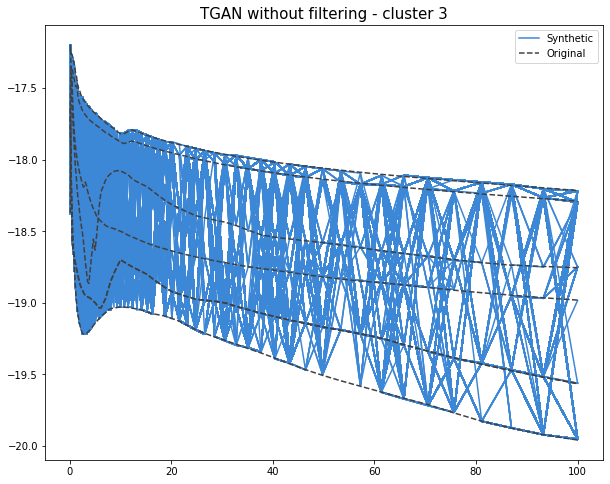

In [33]:
##plt.plot(x1, label = 'Real')
plt.figure(figsize = [10,8])
for i in range(len(syn_data.columns)-1):
    plt.plot(list(df['elastic.energy'][0]), syn_data[i], '#3c87d6', alpha = 1)
    
plt.plot(list(df['elastic.energy'][0]), syn_data[syn_data.columns[-1]], color='#3c87d6', label = 'Synthetic')
#plt.show()

for i in range(len(df_1)):
    plt.plot(list(df['elastic.energy'][0]), df_1.iloc[i], color='#404040', ls = '--', alpha = 1)
plt.plot(list(df['elastic.energy'][0]), df_1.iloc[-1], color='#404040', ls = '--', alpha = 1, label='Original')
# plt.xlim([1e-1, 1e2])
plt.legend()
plt.title('TGAN without filtering - cluster 3', fontsize = 15)
#plt.savefig('fig1.png')

In [27]:
pd.DataFrame(syn_data).to_csv('data_output_c2.csv', index = False)